[143.0, 127.5, 98.5, 96.0, 104.5, 122.0]
I have 77 NTD


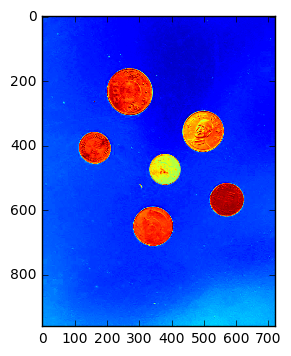

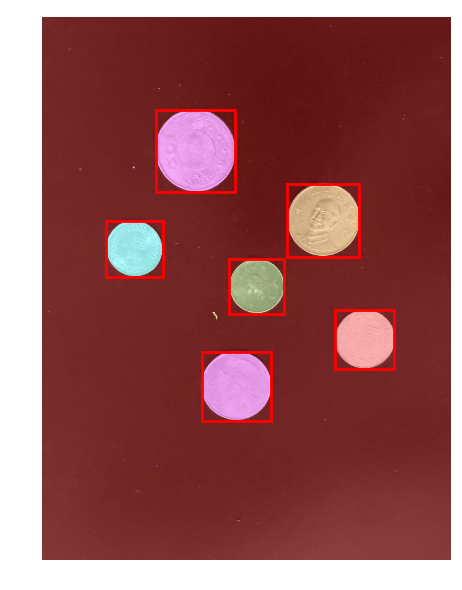

In [82]:
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = img.imread('coins2.jpg')
redComp = image[:,:,0]
plt.imshow(redComp)


# apply threshold
thresh = threshold_otsu(redComp)
bw = closing(redComp > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=redComp)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

diameter = []
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

        width = maxc-minc
        height = maxr-minr
        avgDiameter = (width+height)/2
        diameter.append(avgDiameter)
print(diameter)


# count how much you have
money = 0
for d in diameter:
    if 140 <= d:
        money += 50
    elif 120 <= d < 140:
        money += 10
    elif 100 <= d < 120:
        money += 5
    elif d < 100:
        money += 1
print('I have {} NTD'.format(money))

ax.set_axis_off()
plt.tight_layout()
plt.show()